# Bank Marketing Classification

## OBJECTIVES:
   
1. To understand how bank clients responded to the marketing campaign and assess its effectiveness.
2. To understand characteristics of customer with respect to banking.
3. To develop classification models to predict subscription of term deposit and personal loan.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"D:\SPOO\Documents\Project\bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.shape

(11162, 17)

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
data.shape

(11162, 17)

In [7]:
#check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
#checking for outliers
cat=data.select_dtypes(include="O")
num=data.select_dtypes(exclude="O")

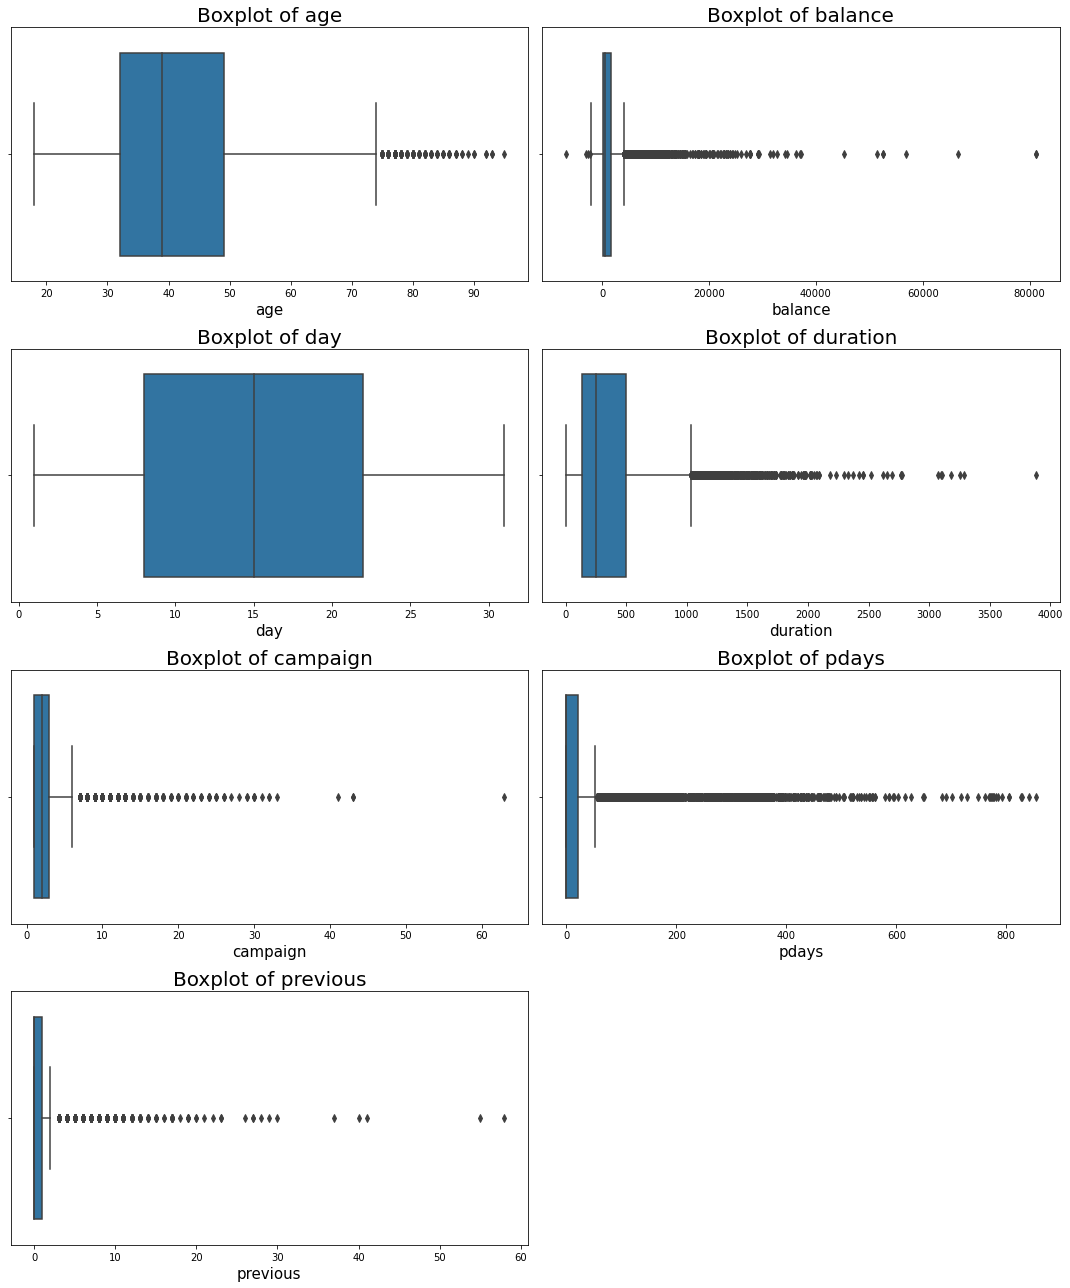

In [9]:
df_num = data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(15,18))
for i,v in enumerate(col):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=v,data=df_num)
    plt.title("Boxplot of {}".format(v),size=20,color="black")
    plt.xlabel("{}".format(v),size=15)
plt.tight_layout()
plt.show()

In [10]:
#handling outliers
#1.negative balance,high balance removed
data.drop(data[(data['balance']>40000)|(data['balance']<0)].index,inplace=True,axis=0)

In [11]:
#2.duration,campaign,previous
data.drop(data[data['duration']>3000].index,inplace=True,axis=0)
data.drop(data[data['campaign']>30].index,inplace=True,axis=0)
data.drop(data[data['previous']>30].index,inplace=True,axis=0)


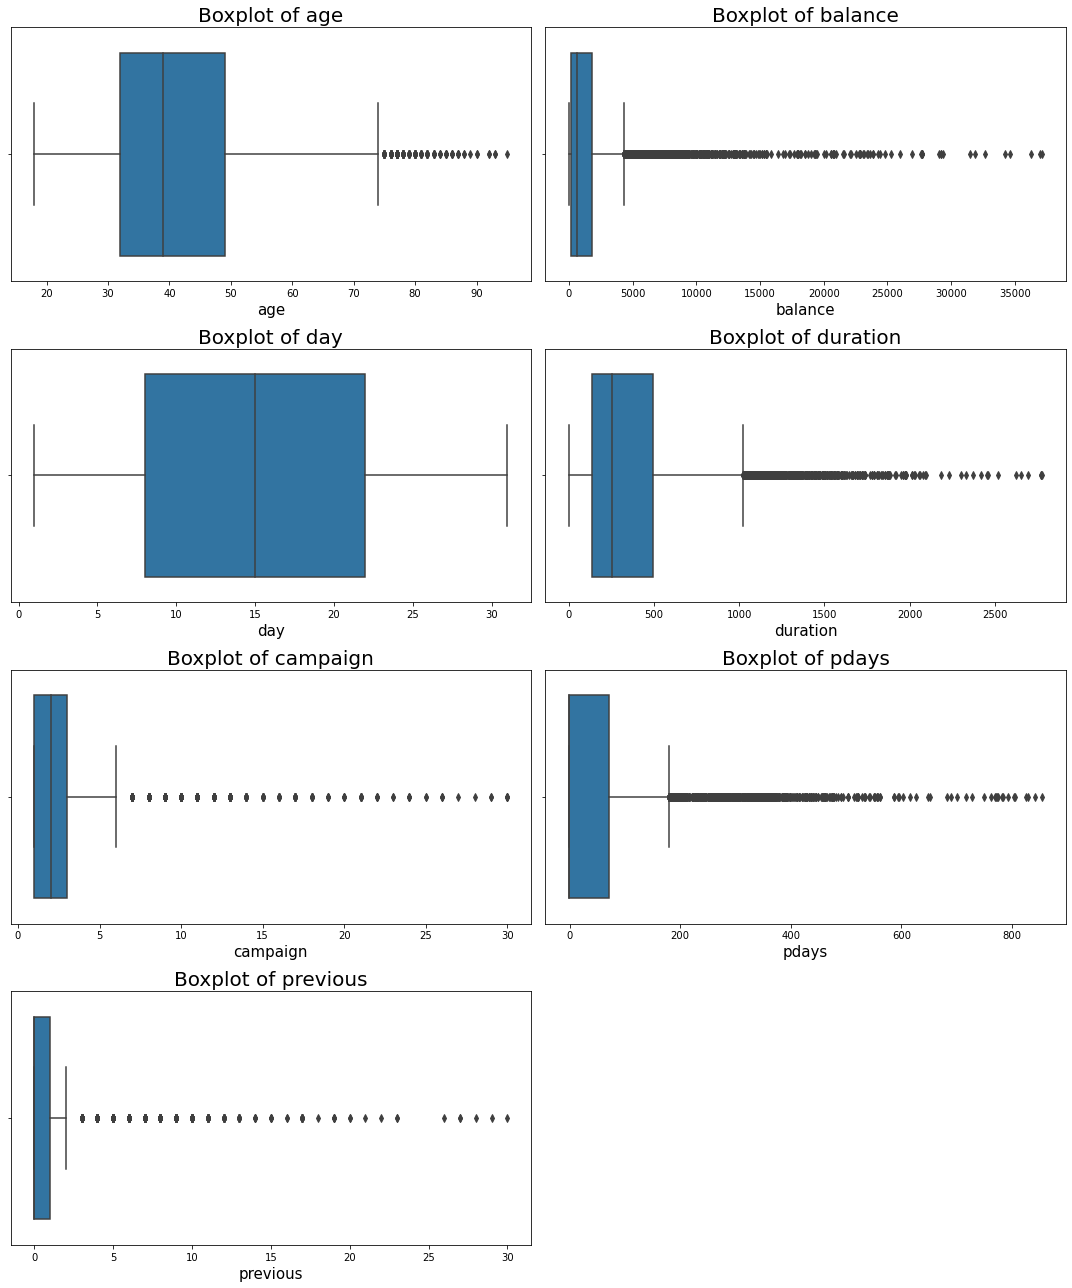

In [12]:
df_num = data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(15,18))
for i,v in enumerate(col):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=v,data=df_num)
    plt.title("Boxplot of {}".format(v),size=20,color="black")
    plt.xlabel("{}".format(v),size=15)
plt.tight_layout()
plt.show()

In [62]:
#data.drop(['pdays'],axis=1,inplace=True)

In [14]:
#EDA

In [23]:
#univariate analysis

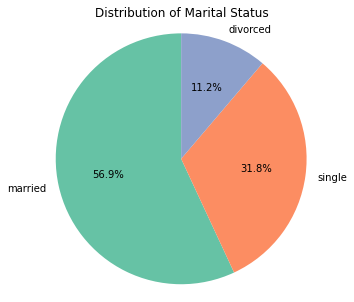

In [13]:
marital_counts = data['marital'].value_counts()
colors = sns.color_palette('Set2', len(marital_counts))
plt.figure(figsize=(5, 5))
plt.pie(marital_counts, labels=marital_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Marital Status')
plt.axis('equal')
plt.show()

In [25]:
#Most of the clients in the bank are Married - 56.9% and Single - 31.8%

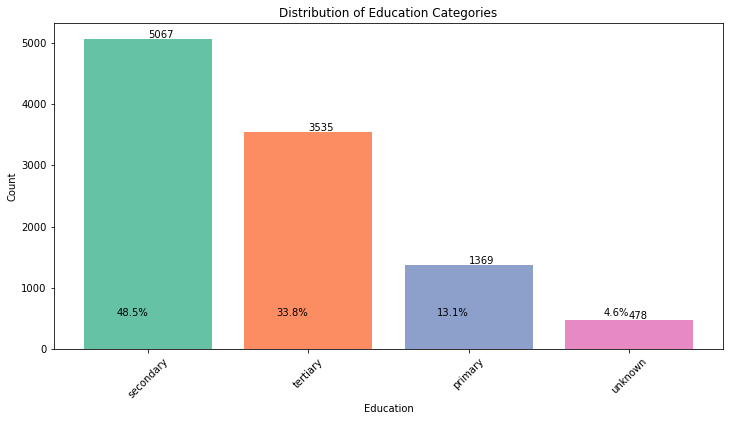

In [14]:
education_counts = data['education'].value_counts()
total_count = education_counts.sum()
percentages = (education_counts / total_count) * 100
colors = sns.color_palette('Set2', len(education_counts))
plt.figure(figsize=(12, 6))
plt.bar(education_counts.index, education_counts.values, color=colors)
for i, count in enumerate(education_counts):
    plt.text(i, count + 20, f'{count}', ha='left')
for i, percent in enumerate(percentages):
    plt.text(i, count + 60, f'{percent:.1f}%', ha='right')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education Categories')
plt.xticks(rotation=45)
plt.show()

In [27]:
#Most of the customers in the bank are related to Secondary - 48.5% and Tertiary - 33.8% Category 
#only 4.6% of the clients are related to unknown category

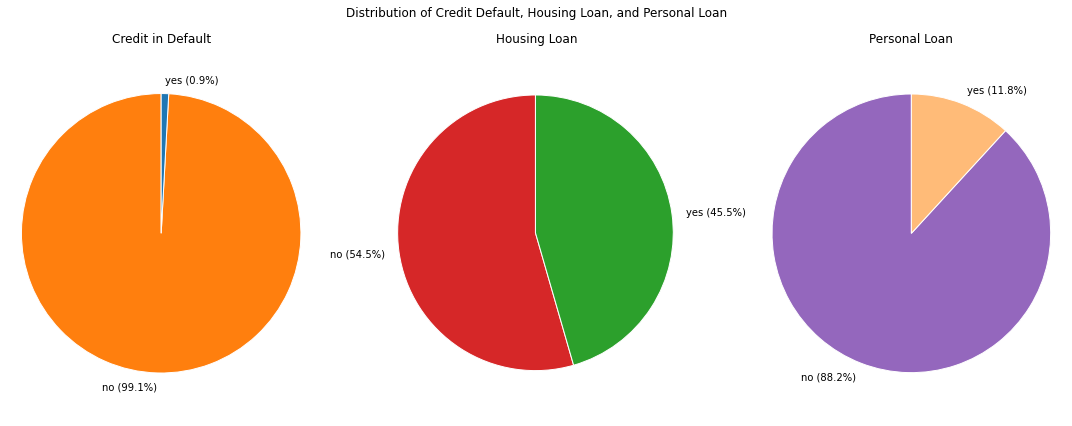

In [15]:
credit_default_counts = data['default'].value_counts()
housing_loan_counts = data['housing'].value_counts()
personal_loan_counts = data['loan'].value_counts()
credit_default_percentages = credit_default_counts / credit_default_counts.sum() * 100
housing_loan_percentages = housing_loan_counts / housing_loan_counts.sum() * 100
personal_loan_percentages = personal_loan_counts / personal_loan_counts.sum() * 100
colors_default = ['#FF7F0E', '#1F77B4']
colors_housing = ['#D62728', '#2CA02C']
colors_personal = ['#9467BD', '#FFBB78']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].pie(credit_default_counts, labels=[f'{k} ({v:.1f}%)' for k, v in zip(credit_default_counts.index, credit_default_percentages)], colors=colors_default, startangle=90, wedgeprops={'edgecolor': 'white'})
ax[0].set_title('Credit in Default')
ax[1].pie(housing_loan_counts, labels=[f'{k} ({v:.1f}%)' for k, v in zip(housing_loan_counts.index, housing_loan_percentages)], colors=colors_housing, startangle=90, wedgeprops={'edgecolor': 'white'})
ax[1].set_title('Housing Loan')
ax[2].pie(personal_loan_counts, labels=[f'{k} ({v:.1f}%)' for k, v in zip(personal_loan_counts.index, personal_loan_percentages)], colors=colors_personal, startangle=90, wedgeprops={'edgecolor': 'white'})
ax[2].set_title('Personal Loan')
fig.suptitle('Distribution of Credit Default, Housing Loan, and Personal Loan')
ax[0].axis('equal')
ax[1].axis('equal')
ax[2].axis('equal')
plt.tight_layout()
plt.show()

In [16]:
'''99.1% customers in the bank doesn't have Credit in Default
54.5% customers in the bank doesn't have Housing Loan
88.2% customers in the bank doesn't have Personal Loan
on comparing with Personal Loan and Housing Loan, Most of the clients subscribed for Housing Loan - 45.5% '''

"99.1% customers in the bank doesn't have Credit in Default\n54.5% customers in the bank doesn't have Housing Loan\n88.2% customers in the bank doesn't have Personal Loan\non comparing with Personal Loan and Housing Loan, Most of the clients subscribed for Housing Loan - 45.5% "

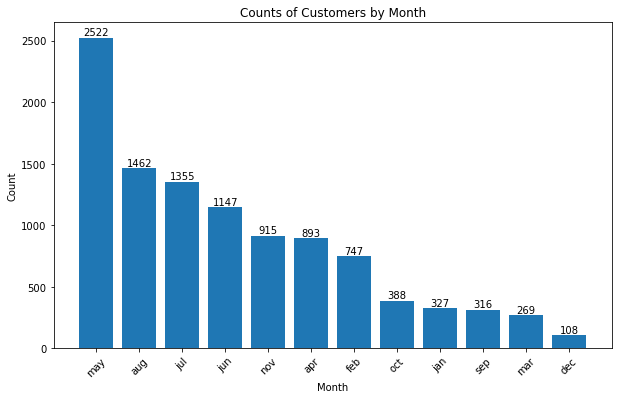

In [17]:
month_counts = data['month'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(month_counts.index, month_counts.values)
for i, count in enumerate(month_counts):
    plt.text(i, count + 20, f'{count}', ha='center')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts of Customers by Month')
plt.xticks(rotation=45)
plt.show()

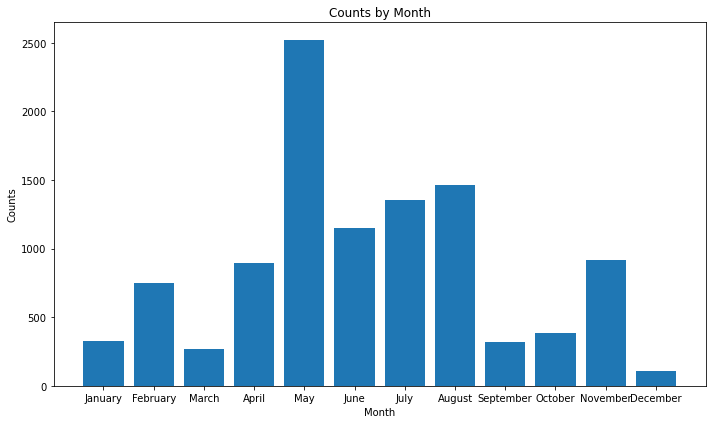

In [18]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
counts = [327, 747, 269, 893, 2522, 1147, 1355, 1462, 316, 388, 915, 108]

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

plt.bar(months, counts)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Counts by Month')

# Display the chart
plt.tight_layout()  # Optional: Improve spacing between elements
plt.show()

In [19]:
'''Most of the clients in the bank are contacted in the months of May,moderately contacted in Jun, Jul and in Aug last year.
very few of the clients are contacted in the months of Mar and in Dec'''

'Most of the clients in the bank are contacted in the months of May,moderately contacted in Jun, Jul and in Aug last year.\nvery few of the clients are contacted in the months of Mar and in Dec'

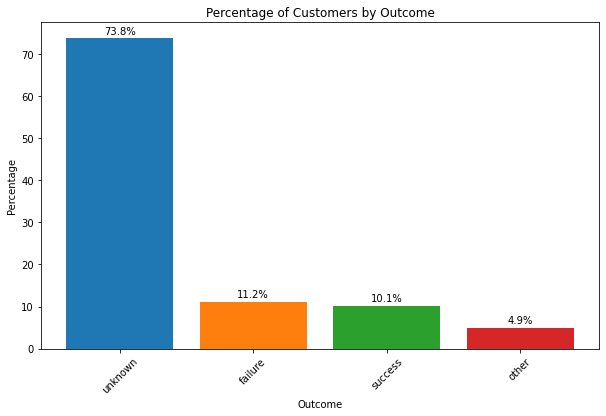

In [20]:
poutcome_counts = data['poutcome'].value_counts()
percentages = (poutcome_counts / poutcome_counts.sum()) * 100
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728']
plt.figure(figsize=(10, 6))
plt.bar(percentages.index, percentages.values, color=colors)
for i, percent in enumerate(percentages):
    plt.text(i, percent + 1, f'{percent:.1f}%', ha='center')
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.title('Percentage of Customers by Outcome')
plt.xticks(rotation=45)
plt.show()

In [21]:
'''From the Outcomes of the previous marketing Campaign most of the results are Unknown ~ 73.8% and Failure ~ 11.2% .
Success rate is very less ~ 10.1%'''

'From the Outcomes of the previous marketing Campaign most of the results are Unknown ~ 73.8% and Failure ~ 11.2% .\nSuccess rate is very less ~ 10.1%'

In [22]:
#statistical analysis

In [35]:
#bivariate analysis

<AxesSubplot:>

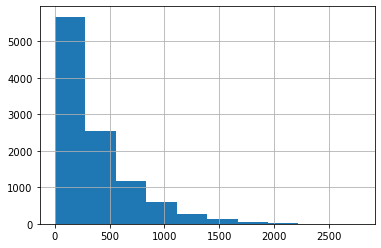

In [23]:
data['duration'].hist()

<AxesSubplot:>

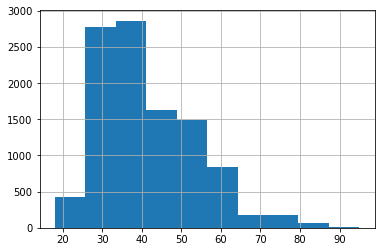

In [24]:
data['age'].hist()

<AxesSubplot:>

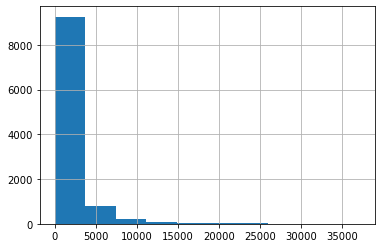

In [25]:
data['balance'].hist()

<AxesSubplot:>

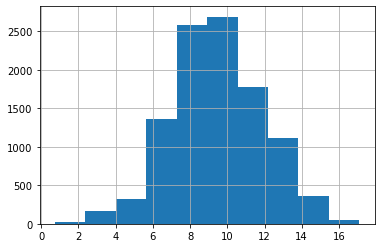

In [26]:
from scipy.stats import boxcox
tdata,lambda_val=boxcox(data['duration'])
data['duration']=tdata
data['duration'].hist()

<AxesSubplot:>

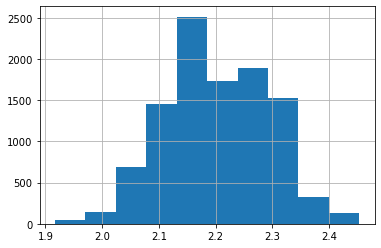

In [27]:
tdata,lambda_val=boxcox(data['age'])
data['age']=tdata
data['age'].hist()

<AxesSubplot:>

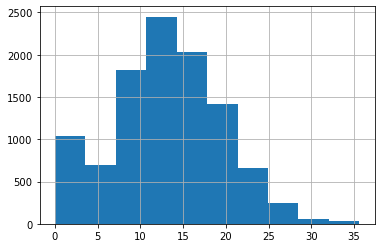

In [28]:
from scipy.stats import yeojohnson
tdata,lambda_val=yeojohnson(data['balance'])
data['balance']=tdata
data['balance'].hist()

D:\anaconda12\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, ' Q-Q plot represent the distribution of age')

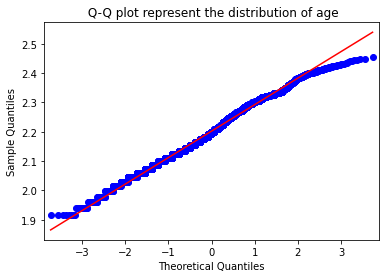

In [29]:
import statsmodels.graphics.gofplots as sm
sm.qqplot(data["age"],line="s")

plt.title(" Q-Q plot represent the distribution of age")

D:\anaconda12\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, ' Q-Q plot represent the distribution of balance')

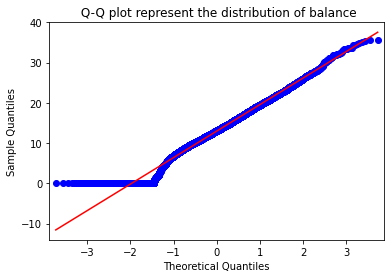

In [30]:
import statsmodels.graphics.gofplots as sm
sm.qqplot(data["balance"],line="s")

plt.title(" Q-Q plot represent the distribution of balance")

D:\anaconda12\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, ' Q-Q plot represent the distribution of duration')

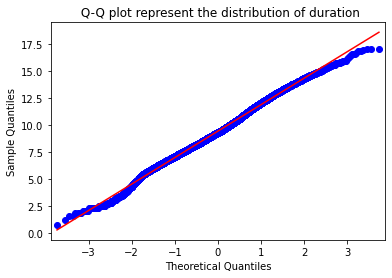

In [31]:
import statsmodels.graphics.gofplots as sm
sm.qqplot(data["duration"],line="s")

plt.title(" Q-Q plot represent the distribution of duration")

In [32]:
#statistical tests

In [33]:
#Testing the significant difference between the deposit and balance
from scipy.stats import ttest_ind
accepted_balance = data[data['deposit'] == 'yes']['balance']
rejected_balance = data[data['deposit'] =='no']['balance']
t_statistic, p_value = ttest_ind(accepted_balance, rejected_balance)
print(t_statistic, p_value )
if p_value < 0.05:
    print("There is a significant difference in mean bank balance between the customers who open a term deposit and not.")
else:
    print("There is no significant difference in mean bank balance between the customers who open a term deposit and not.")

13.724974903910706 1.680124928240775e-42
There is a significant difference in mean bank balance between the customers who open a term deposit and not.


In [34]:
#Testing the significant difference between the deposit and age
from scipy.stats import ttest_ind
accepted_balance = data[data['deposit'] == 'yes']['age']
rejected_balance = data[data['deposit'] =='no']['age']
t_statistic, p_value = ttest_ind(accepted_balance, rejected_balance)
print(t_statistic, p_value )
if p_value < 0.05:
    print("There is a significant difference in mean age between customers who open a term deposit and not.")
else:
    print("There is no significant difference in mean age between customers who open a term deposit and not.")

-0.7060672572448603 0.48016205738082973
There is no significant difference in mean age between customers who open a term deposit and not.


In [35]:
#Testing the significant difference between the personal loan and balance of the individual
from scipy.stats import ttest_ind
accepted_balance = data[data['loan'] == 'yes']['balance']
rejected_balance = data[data['loan'] =='no']['balance']
t_statistic, p_value = ttest_ind(accepted_balance, rejected_balance)
print(t_statistic, p_value )
if p_value < 0.05:
    print("There is a significant difference in mean bank balance between customers who has a personal loan and not.")
else:
    print("There is no significant difference in mean bank balance between customers who has a personal loan and not.")

-9.233270421579617 3.133283488428764e-20
There is a significant difference in mean bank balance between customers who has a personal loan and not.


In [36]:
#Testing the significant difference between the personal loan and age
from scipy.stats import ttest_ind
accepted_balance = data[data['loan'] == 'yes']['age']
rejected_balance = data[data['loan'] =='no']['age']
t_statistic, p_value = ttest_ind(accepted_balance, rejected_balance)
print(t_statistic, p_value )
if p_value < 0.05:
    print("There is a significant difference in mean age between customers who has a personal loan and not.")
else:
    print("There is no significant difference in mean age between customers who has a personal loan and not.")

-1.5346928202228447 0.12488958256785732
There is no significant difference in mean age between customers who has a personal loan and not.


In [37]:
#Testing the association between deposit and marital status

from scipy.stats import chi2_contingency
education_marital_crosstab = pd.crosstab(data['deposit'], data['marital'])
chi2_stat, p_value, _, _ = chi2_contingency(education_marital_crosstab)
print(p_value)
print(education_marital_crosstab)
if p_value < 0.05:
    print("There is a significant relationship between deposit and marital status.")
else:
    print("There is no significant relationship between deposit and marital status.")

1.3151555300064489e-20
marital  divorced  married  single
deposit                           
no            596     3290    1496
yes           577     2659    1831
There is a significant relationship between deposit and marital status.


In [38]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    r_corr = r - ((r-1)**2) / (n-1)
    k_corr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))

# Example usage:
variable1 = data['deposit']
variable2 = data['marital']

cramer_v = cramers_v(variable1, variable2)
print("Cramer's V:", cramer_v)

Cramer's V: 0.09258253594505322


In [39]:
import scipy.stats as stats

#Chi-squared test statistic, sample size, and minimum of rows and columns
X2 = stats.chi2_contingency(education_marital_crosstab, correction=False)[0]
n = education_marital_crosstab.sum().sum()
minDim = min(data.shape)-1

#calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)

#display Cramer's V
print(V)

0.023401562126413807


In [42]:
#Testing the association between deposit and contacts performed
from scipy.stats import chi2_contingency
education_marital_crosstab = pd.crosstab(data['deposit'], data['contact'])
chi2_stat, p_value, _, _ = chi2_contingency(education_marital_crosstab)
print(p_value)
print(education_marital_crosstab)
if p_value < 0.05:
    print("There is a significant relationship between deposit and contacts performed.")
else:
    print("There is no significant relationship between deposit and contacts performed.")

1.2094637110074326e-152
contact  cellular  telephone  unknown
deposit                              
no           3400        359     1623
yes          4204        384      479
There is a significant relationship between deposit and contacts performed.


In [43]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    r_corr = r - ((r-1)**2) / (n-1)
    k_corr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))

# Example usage:
variable1 = data['deposit']
variable2 = data['contact']

cramer_v = cramers_v(variable1, variable2)
print("Cramer's V:", cramer_v)

Cramer's V: 0.2583975031508044


In [44]:
#Testing the association between deposit and contacts performed
from scipy.stats import chi2_contingency
education_marital_crosstab = pd.crosstab(data['deposit'], data['contact'])
education_marital_crosstab

contact,cellular,telephone,unknown
deposit,,,
no,3400,359,1623
yes,4204,384,479


In [45]:
#Testing the association between deposit and previous outcome
from scipy.stats import chi2_contingency
education_marital_crosstab = pd.crosstab(data['deposit'], data['poutcome'])
chi2_stat, p_value, _, _ = chi2_contingency(education_marital_crosstab)
print(p_value)
print(education_marital_crosstab)
if p_value < 0.05:
    print("There is a significant relationship between deposit and previous outcome.")
else:
    print("There is no significant relationship between deposit and previous outcome.")

1.4639958675420722e-204
poutcome  failure  other  success  unknown
deposit                                   
no            573    217       92     4500
yes           595    297      968     3207
There is a significant relationship between deposit and previous outcome.


In [46]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    r_corr = r - ((r-1)**2) / (n-1)
    k_corr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))

# Example usage:
variable1 = data['deposit']
variable2 = data['poutcome']

cramer_v = cramers_v(variable1, variable2)
print("Cramer's V:", cramer_v)

Cramer's V: 0.3002828418757206


In [47]:
#Testing the association between personal loan and previous outcome
from scipy.stats import chi2_contingency
education_marital_crosstab = pd.crosstab(data['loan'], data['education'])
chi2_stat, p_value, _, _ = chi2_contingency(education_marital_crosstab)
print(p_value)
print(education_marital_crosstab)
if p_value < 0.05:
    print("There is a significant relationship between personal loan and previous outcome.")
else:
    print("There is no significant relationship between personal loan and previous outcome.")

1.0510217160327127e-18
education  primary  secondary  tertiary  unknown
loan                                            
no            1208       4334      3215      458
yes            161        733       320       20
There is a significant relationship between personal loan and previous outcome.


In [48]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    r_corr = r - ((r-1)**2) / (n-1)
    k_corr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))

# Example usage:
variable1 = data['loan']
variable2 = data['contact']

cramer_v = cramers_v(variable1, variable2)
print("Cramer's V:", cramer_v)

Cramer's V: 0.020033199741110702


In [49]:
#Testing the association between personal loan and marital status
from scipy.stats import chi2_contingency
education_marital_crosstab = pd.crosstab(data['loan'], data['marital'])
chi2_stat, p_value, _, _ = chi2_contingency(education_marital_crosstab)
print(p_value)
print(education_marital_crosstab)
if p_value < 0.05:
    print("There is a significant relationship between personal loan and marital status.")
else:
    print("There is no significant relationship between personal loan and marital status.")

7.289681441660971e-10
marital  divorced  married  single
loan                              
no           1010     5172    3033
yes           163      777     294
There is a significant relationship between personal loan and marital status.


In [50]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    r_corr = r - ((r-1)**2) / (n-1)
    k_corr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))

# Example usage:
variable1 = data['loan']
variable2 = data['marital']

cramer_v = cramers_v(variable1, variable2)
print("Cramer's V:", cramer_v)

Cramer's V: 0.06193549903136715


In [51]:
#model building

In [52]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['job']=le.fit_transform(data['job'])
data['marital']=le.fit_transform(data['marital'])
data['education']=le.fit_transform(data['education'])
data['housing']=le.fit_transform(data['housing'])
data['loan']=le.fit_transform(data['loan'])
data['contact']=le.fit_transform(data['contact'])
data['month']=le.fit_transform(data['month'])
data['poutcome']=le.fit_transform(data['poutcome'])
data['deposit']=le.fit_transform(data['deposit'])
data['default']=le.fit_transform(data['default'])

In [53]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit_transform(data)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

In [55]:
#logistic regression
#target is deposit

In [56]:
#split data
from sklearn.model_selection import train_test_split
X = data.drop('deposit', axis = 1)
y = data['deposit']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7314, 16)
(7314,)
(3135, 16)
(3135,)


In [58]:
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()
model1.fit(X_train,y_train)

y_train_pred = model1.predict(X_train)
y_test_pred =  model1.predict(X_test)
# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) 
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) 
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
from sklearn.metrics import mean_squared_error
# Calculate MSE
mse = mean_squared_error(y_train,y_train_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Square Error (RMSE):", rmse)

Model performance for Training set
- Accuracy: 0.7923
- F1 score: 0.792360
- Precision: 0.792486
- Recall: 0.792316
Model performance for Test set
- Accuracy: 0.7831
- Fl score: 0.7831
- Precision: 0.7831
- Recall: 0.7831
Root Mean Square Error (RMSE): 0.45572348403621415


D:\anaconda12\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
!pip install statsmodels
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.459815
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                10449
Model:                          Logit   Df Residuals:                    10433
Method:                           MLE   Df Model:                           15
Date:                Sat, 13 Jan 2024   Pseudo R-squ.:                  0.3362
Time:                        10:48:45   Log-Likelihood:                -4804.6
converged:                       True   LL-Null:                       -7237.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -2.8609      0.093    -30.869      0.000      -3.043      -2.679
job            0.0023      0.

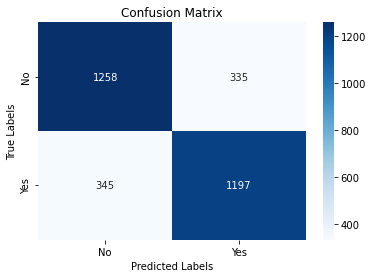

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
class_names = ['No', 'Yes']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Random forest

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [64]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 70, 90],
    'max_depth': [1, 2, 3],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
classifier = RandomForestClassifier(random_state=42)


In [65]:
#Perform grid search
grid_search = RandomizedSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Use the best model for prediction

best_model_rf = grid_search.best_estimator_

y_train_pred = best_model_rf.predict(X_train)
y_test_pred =  best_model_rf.predict(X_test)
# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) 
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) 
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
mse = mean_squared_error(y_train,y_train_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Square Error (RMSE):", rmse)

Model performance for Training set
- Accuracy: 0.8031
- F1 score: 0.803162
- Precision: 0.803316
- Recall: 0.803117
Model performance for Test set
- Accuracy: 0.7911
- Fl score: 0.7911
- Precision: 0.7911
- Recall: 0.7911
Root Mean Square Error (RMSE): 0.44371465011886485


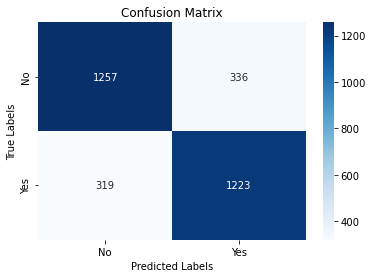

In [66]:
cm = confusion_matrix(y_test, y_test_pred)
class_names = ['No', 'Yes']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#naive bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of the Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)
y_test_pred =  classifier.predict(X_test)
# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) 
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) 
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
mse = mean_squared_error(y_train,y_train_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Square Error (RMSE):", rmse)

Model performance for Training set
- Accuracy: 0.7327
- F1 score: 0.731389
- Precision: 0.742251
- Recall: 0.732704
Model performance for Test set
- Accuracy: 0.7292
- Fl score: 0.7278
- Precision: 0.7359
- Recall: 0.7292
Root Mean Square Error (RMSE): 0.51700638050635


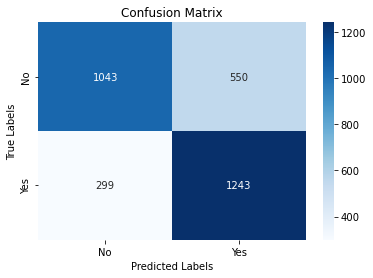

In [68]:
cm = confusion_matrix(y_test, y_test_pred)
class_names = ['No', 'Yes']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [69]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [70]:
model= xgb.XGBClassifier()
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred =  model.predict(X_test)
# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) 
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) 
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
mse = mean_squared_error(y_train,y_train_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Square Error (RMSE):", rmse)

Model performance for Training set
- Accuracy: 0.9766
- F1 score: 0.976625
- Precision: 0.976710
- Recall: 0.976620
Model performance for Test set
- Accuracy: 0.8507
- Fl score: 0.8507
- Precision: 0.8513
- Recall: 0.8507
Root Mean Square Error (RMSE): 0.15290460923137722


In [71]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [1,2,3],
    'n_estimators': [100, 200, 300]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model_xg = grid_search.best_estimator_

# Train the best model
best_model_xg.fit(X_train, y_train)


y_train_pred = best_model_xg.predict(X_train)
y_test_pred =  best_model_xg.predict(X_test)
# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) 
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) 
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
mse = mean_squared_error(y_train,y_train_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Square Error (RMSE):", rmse)

Model performance for Training set
- Accuracy: 0.8778
- F1 score: 0.877792
- Precision: 0.879375
- Recall: 0.877769
Model performance for Test set
- Accuracy: 0.8507
- Fl score: 0.8507
- Precision: 0.8514
- Recall: 0.8507
Root Mean Square Error (RMSE): 0.3496159852775726


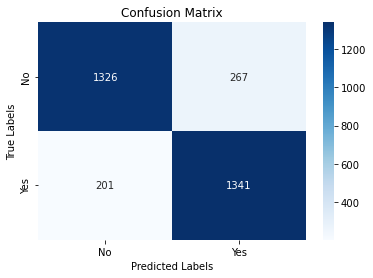

In [72]:
cm = confusion_matrix(y_test, y_test_pred)
class_names = ['No', 'Yes']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [73]:
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = best_model_rf.predict_proba(X_test)
pred_prob3 = best_model_xg.predict_proba(X_test)
pred_prob4 = classifier.predict_proba(X_test)

In [74]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [75]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])


print(auc_score1, auc_score2)

0.859248023331648 0.8646111432719183


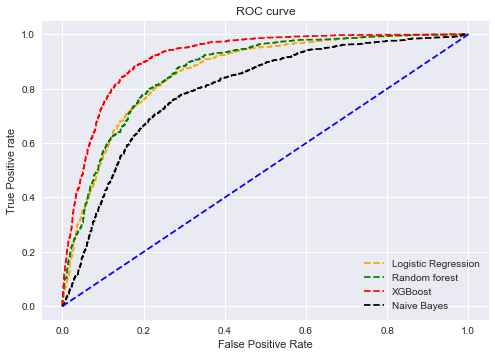

In [76]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='XGBoost')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [77]:
data.deposit.value_counts()

0    5382
1    5067
Name: deposit, dtype: int64

In [ ]:
#personal loan

In [78]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Split the data into features and target variable
X = data.drop('loan', axis=1)
y = data['loan']

In [79]:
data['loan'].value_counts()

0    9215
1    1234
Name: loan, dtype: int64

In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
# Apply SMOTE oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 9215, 1: 9215}


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [82]:
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()
model1.fit(X_train,y_train)

y_train_pred = model1.predict(X_train)
y_test_pred =  model1.predict(X_test)
# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) 
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) 
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
mse = mean_squared_error(y_train,y_train_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Square Error (RMSE):", rmse)

Model performance for Training set
- Accuracy: 0.7104
- F1 score: 0.710251
- Precision: 0.710717
- Recall: 0.710391
Model performance for Test set
- Accuracy: 0.7113
- Fl score: 0.7109
- Precision: 0.7133
- Recall: 0.7113
Root Mean Square Error (RMSE): 0.538153632905953


D:\anaconda12\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
!pip install statsmodels
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.346213
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   loan   No. Observations:                10449
Model:                          Logit   Df Residuals:                    10433
Method:                           MLE   Df Model:                           15
Date:                Sat, 13 Jan 2024   Pseudo R-squ.:                 0.04655
Time:                        10:52:02   Log-Likelihood:                -3617.6
converged:                       True   LL-Null:                       -3794.2
Covariance Type:            nonrobust   LLR p-value:                 4.352e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.5134      0.108     -4.770      0.000      -0.724      -0.302
job           -0.0418      0.

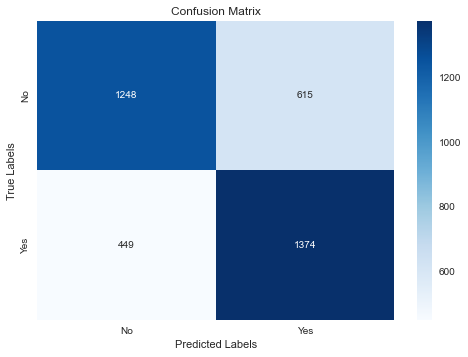

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
class_names = ['No', 'Yes']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#random forest

In [85]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 70, 90],
    'max_depth': [1, 2, 3],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
classifier = RandomForestClassifier(random_state=42)

In [86]:
#Perform grid search
grid_search = RandomizedSearchCV(classifier, param_grid, cv=5)

In [87]:
grid_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [1, 2, 3],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [50, 70, 90]})

In [88]:
# Use the best model for prediction

best_model_rf = grid_search.best_estimator_

y_train_pred = best_model_rf.predict(X_train)
y_test_pred =  best_model_rf.predict(X_test)
# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) 
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) 
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
mse = mean_squared_error(y_train,y_train_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Square Error (RMSE):", rmse)

Model performance for Training set
- Accuracy: 0.7407
- F1 score: 0.740180
- Precision: 0.742504
- Recall: 0.740708
Model performance for Test set
- Accuracy: 0.7436
- Fl score: 0.7426
- Precision: 0.7486
- Recall: 0.7436
Root Mean Square Error (RMSE): 0.5092071438573882


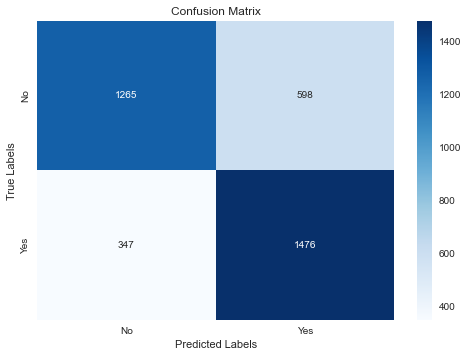

In [89]:
cm = confusion_matrix(y_test, y_test_pred)
class_names = ['No', 'Yes']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [90]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of the Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)
y_train_pred = classifier.predict(X_train)
y_test_pred =  classifier.predict(X_test)
# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) 
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) 
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
mse = mean_squared_error(y_train,y_train_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Square Error (RMSE):", rmse)

Model performance for Training set
- Accuracy: 0.7174
- F1 score: 0.714809
- Precision: 0.725118
- Recall: 0.717377
Model performance for Test set
- Accuracy: 0.7151
- Fl score: 0.7113
- Precision: 0.7291
- Recall: 0.7151
Root Mean Square Error (RMSE): 0.5316234005792141


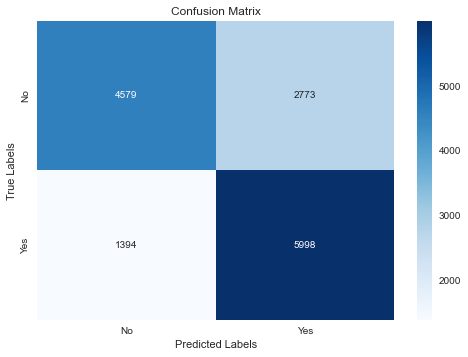

In [91]:
cm = confusion_matrix(y_train, y_train_pred)
class_names = ['No', 'Yes']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [95]:
model= xgb.XGBClassifier()
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred =  model.predict(X_test)
# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) 
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) 
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
mse = mean_squared_error(y_train,y_train_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Square Error (RMSE):", rmse)

Model performance for Training set
- Accuracy: 0.9645
- F1 score: 0.964442
- Precision: 0.965538
- Recall: 0.964460
Model performance for Test set
- Accuracy: 0.9238
- Fl score: 0.9237
- Precision: 0.9247
- Recall: 0.9238
Root Mean Square Error (RMSE): 0.1885202393097584


In [96]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [1,2,3],
    'n_estimators': [50,75,100]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model_xg = grid_search.best_estimator_

# Train the best model
best_model_xg.fit(X_train, y_train)


y_train_pred = best_model_xg.predict(X_train)
y_test_pred =  best_model_xg.predict(X_test)
# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred) 
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred) 
model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:4f}'.format(model_train_f1))
print('- Precision: {:4f}'.format(model_train_precision))
print('- Recall: {:4f}'.format(model_train_recall))

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
print('- Fl score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
mse = mean_squared_error(y_train,y_train_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Square Error (RMSE):", rmse)

Model performance for Training set
- Accuracy: 0.8022
- F1 score: 0.802024
- Precision: 0.803322
- Recall: 0.802225
Model performance for Test set
- Accuracy: 0.7968
- Fl score: 0.7964
- Precision: 0.8001
- Recall: 0.7968
Root Mean Square Error (RMSE): 0.4447194241886431


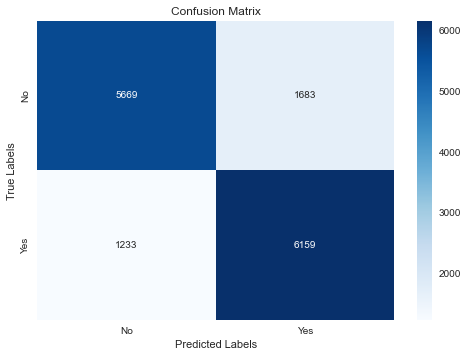

In [97]:
cm = confusion_matrix(y_train, y_train_pred)
class_names = ['No', 'Yes']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [98]:
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = best_model_rf.predict_proba(X_test)
pred_prob3 = best_model_xg.predict_proba(X_test)
pred_prob4 = classifier.predict_proba(X_test)

In [99]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [100]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score2)

0.7727896276156431 0.8207889056426665


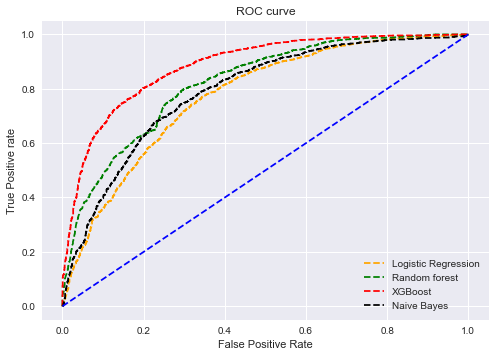

In [101]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='XGBoost')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();